In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint, uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import time


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("daibatic.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# check the number of duplicates row
df.duplicated().sum()

3854

In [6]:
# drop the duplicates row
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
# check the number of null value
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.describe(include='object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [10]:
df["gender"].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
# list of numeric and categorical column
numeric_col=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
non_numeric_col=['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

In [13]:
df.select_dtypes(exclude=object).columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [14]:
# histogram and boxplot of numeric column
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(16,5))    
    sns.histplot(x=df[col], kde=True, bins=20, color='skyblue',ax=ax[0])
    ax[0].set_title(f'Histogram of {col}.')
    
    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}     ')

 Univariate analysis for age column:
 Univariate analysis for bmi column:
 Univariate analysis for HbA1c_level column:
 Univariate analysis for blood_glucose_level column:


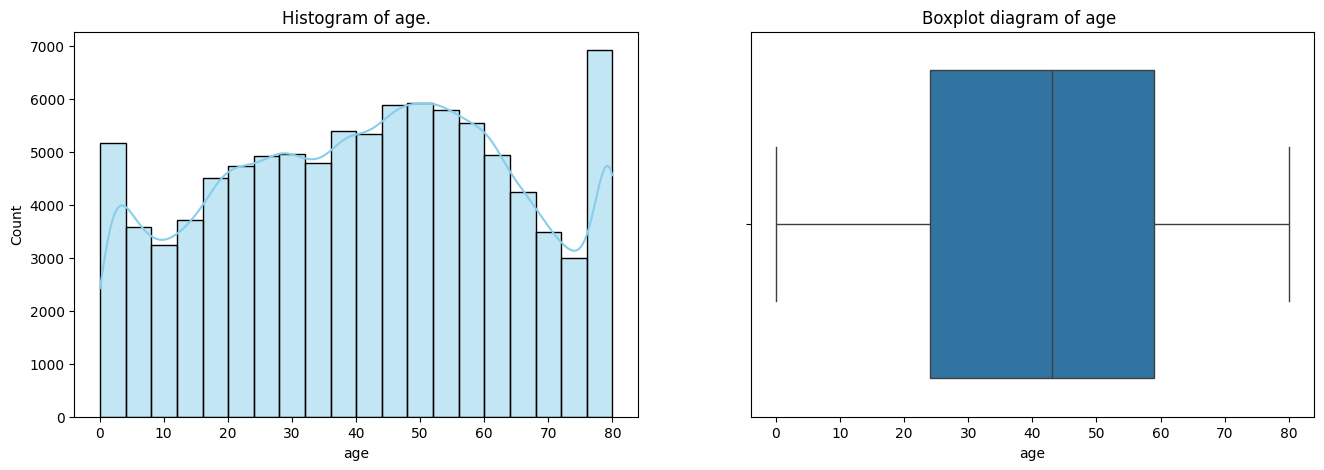

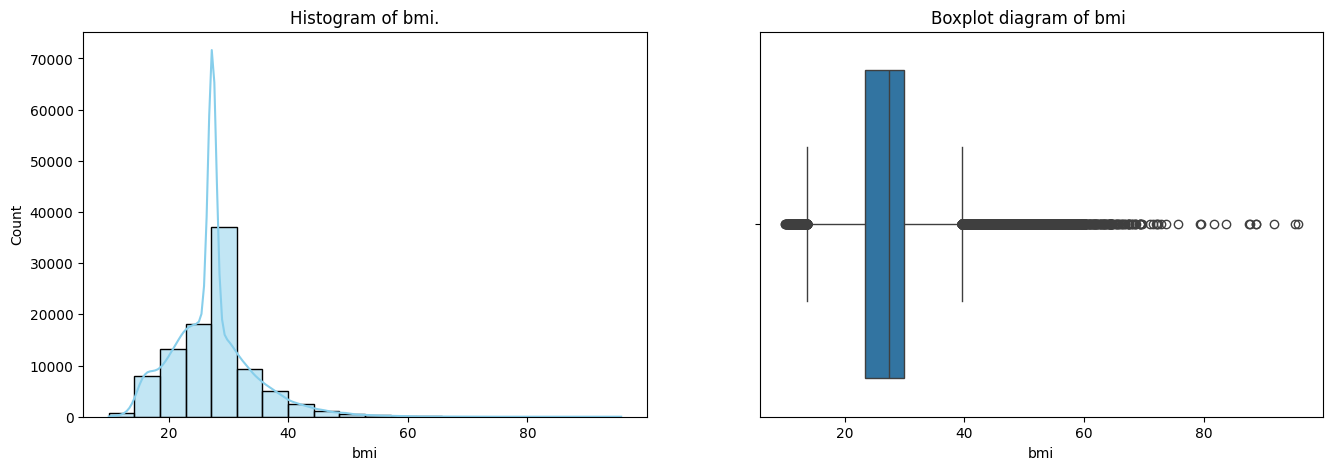

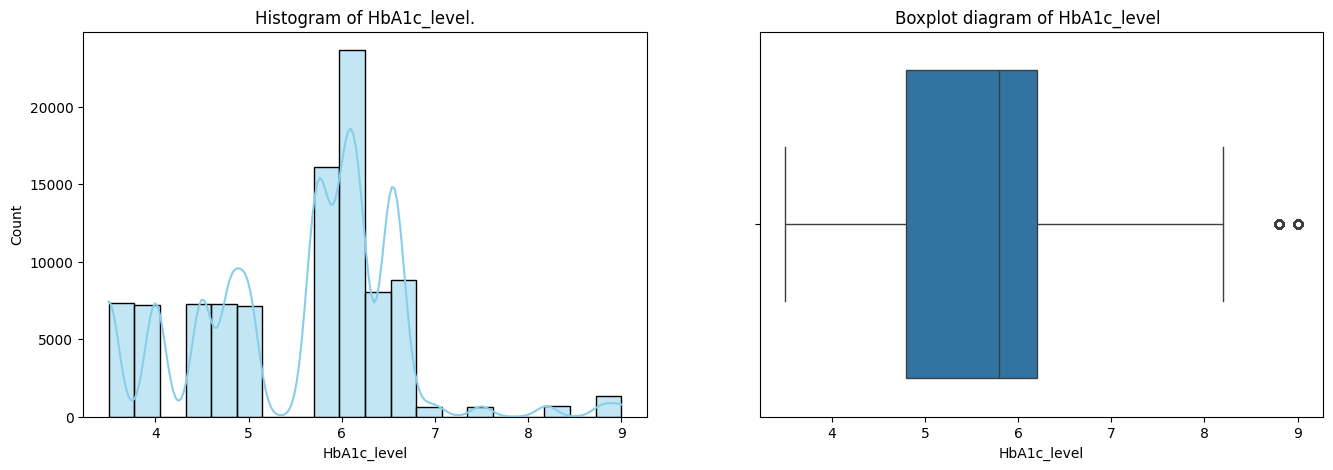

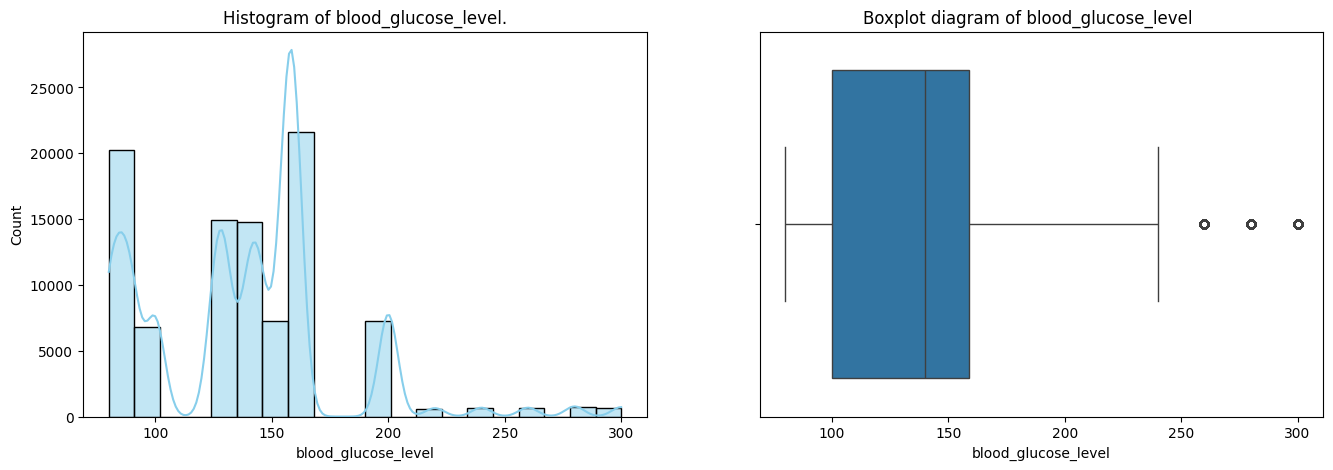

In [15]:
for col in numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

In [16]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    plt.show()

 Univariate analysis for gender column:


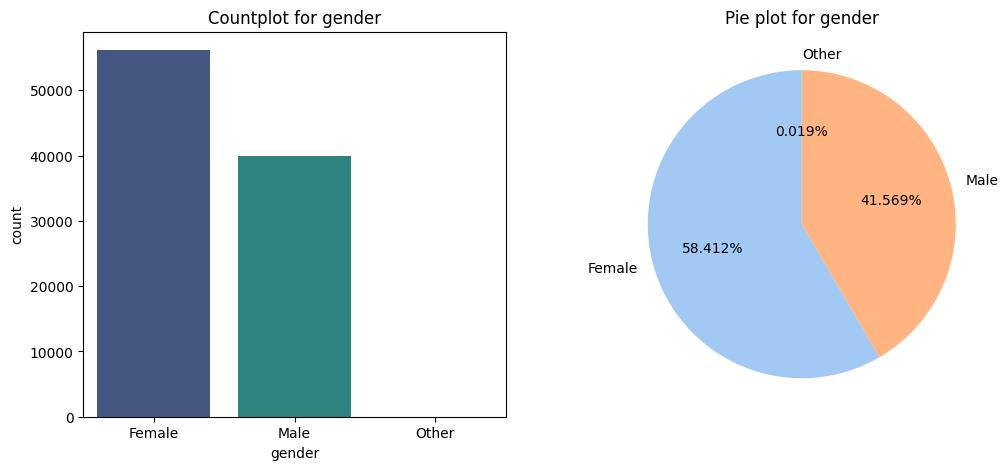

 Univariate analysis for hypertension column:


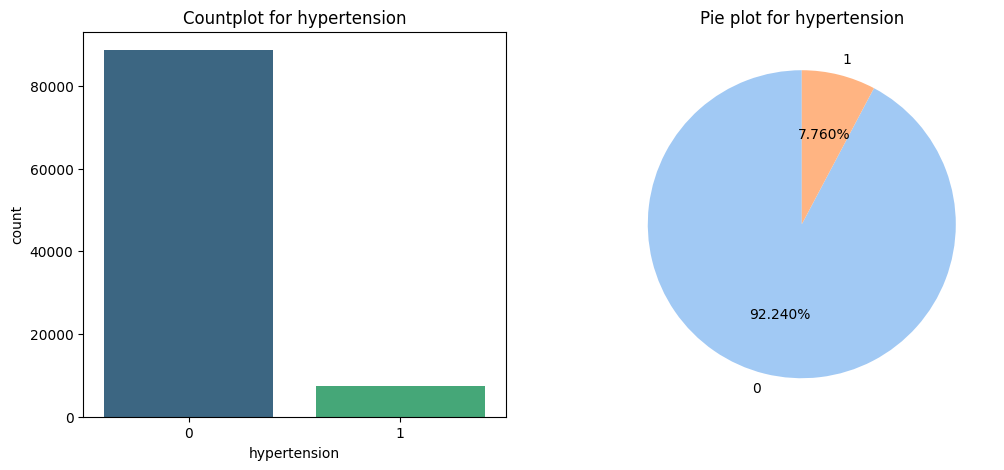

 Univariate analysis for heart_disease column:


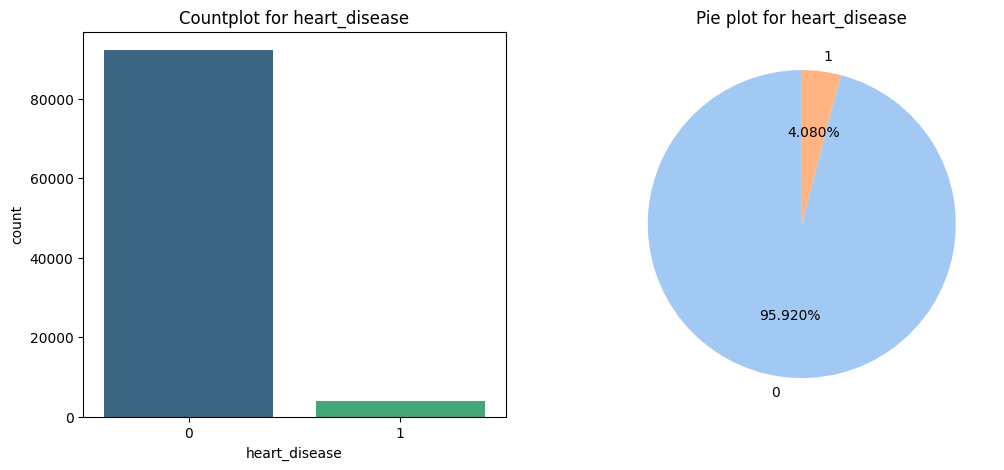

 Univariate analysis for smoking_history column:


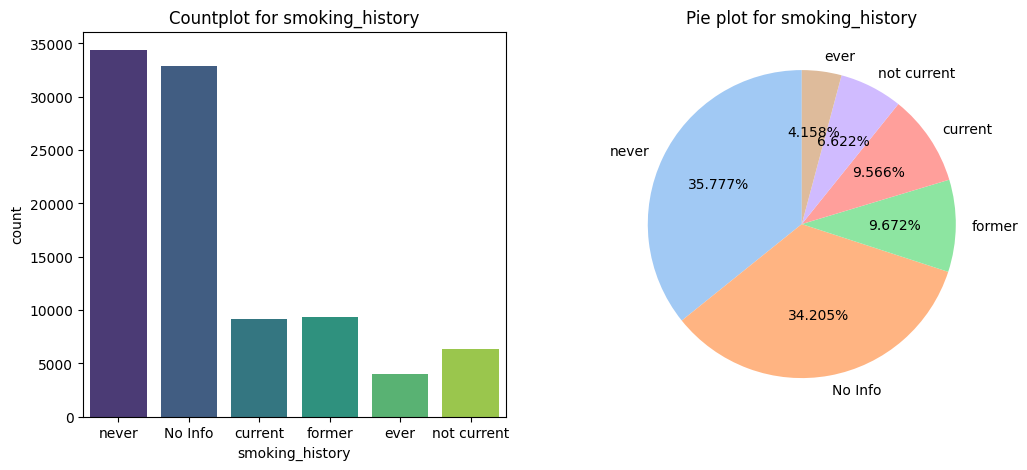

 Univariate analysis for diabetes column:


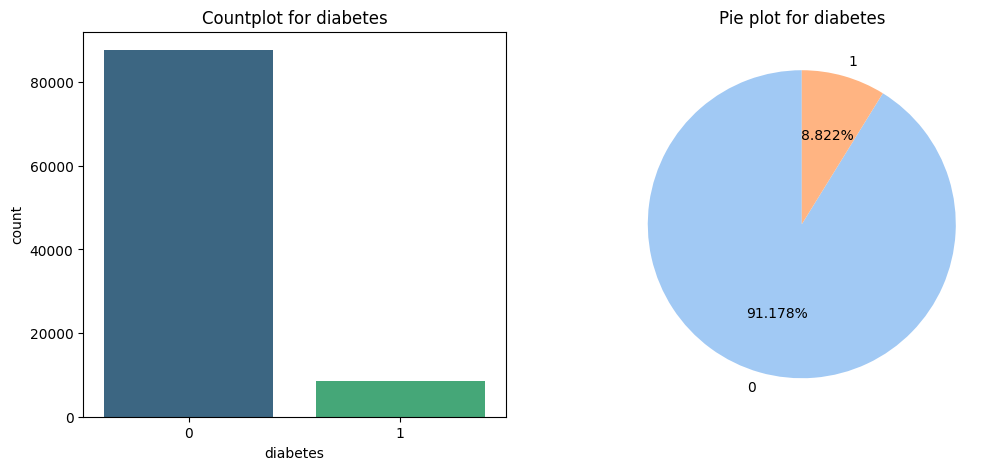

In [17]:
for col in non_numeric_col:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

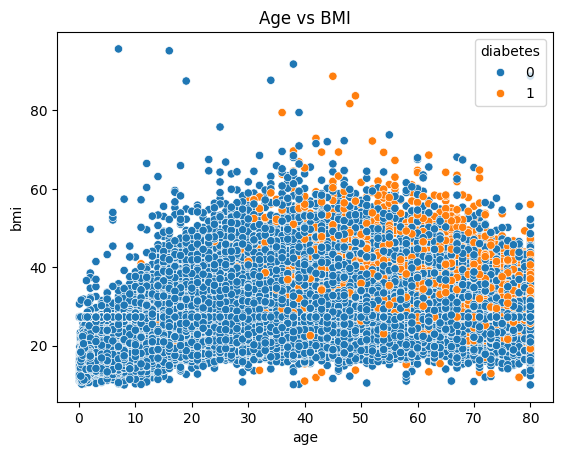

In [18]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

### scatter plot show the most of the diabatic patients above 30

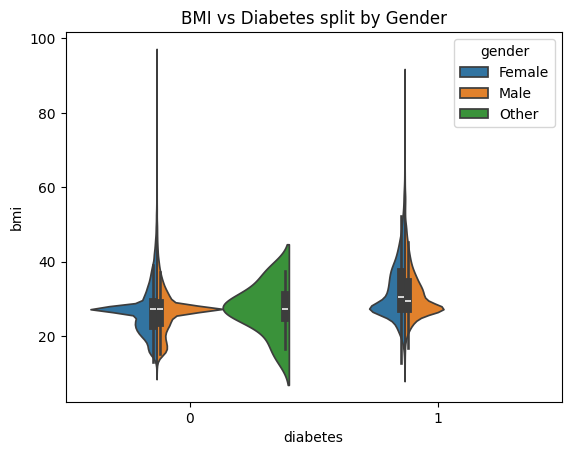

In [19]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

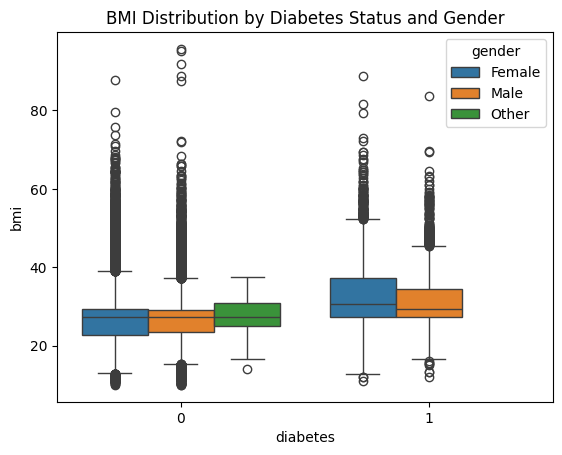

In [20]:
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

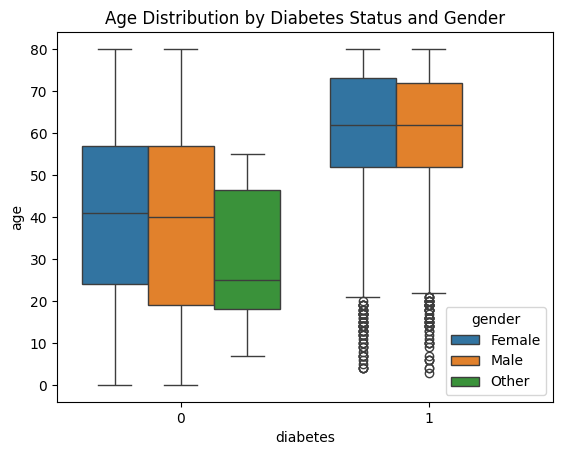

In [21]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

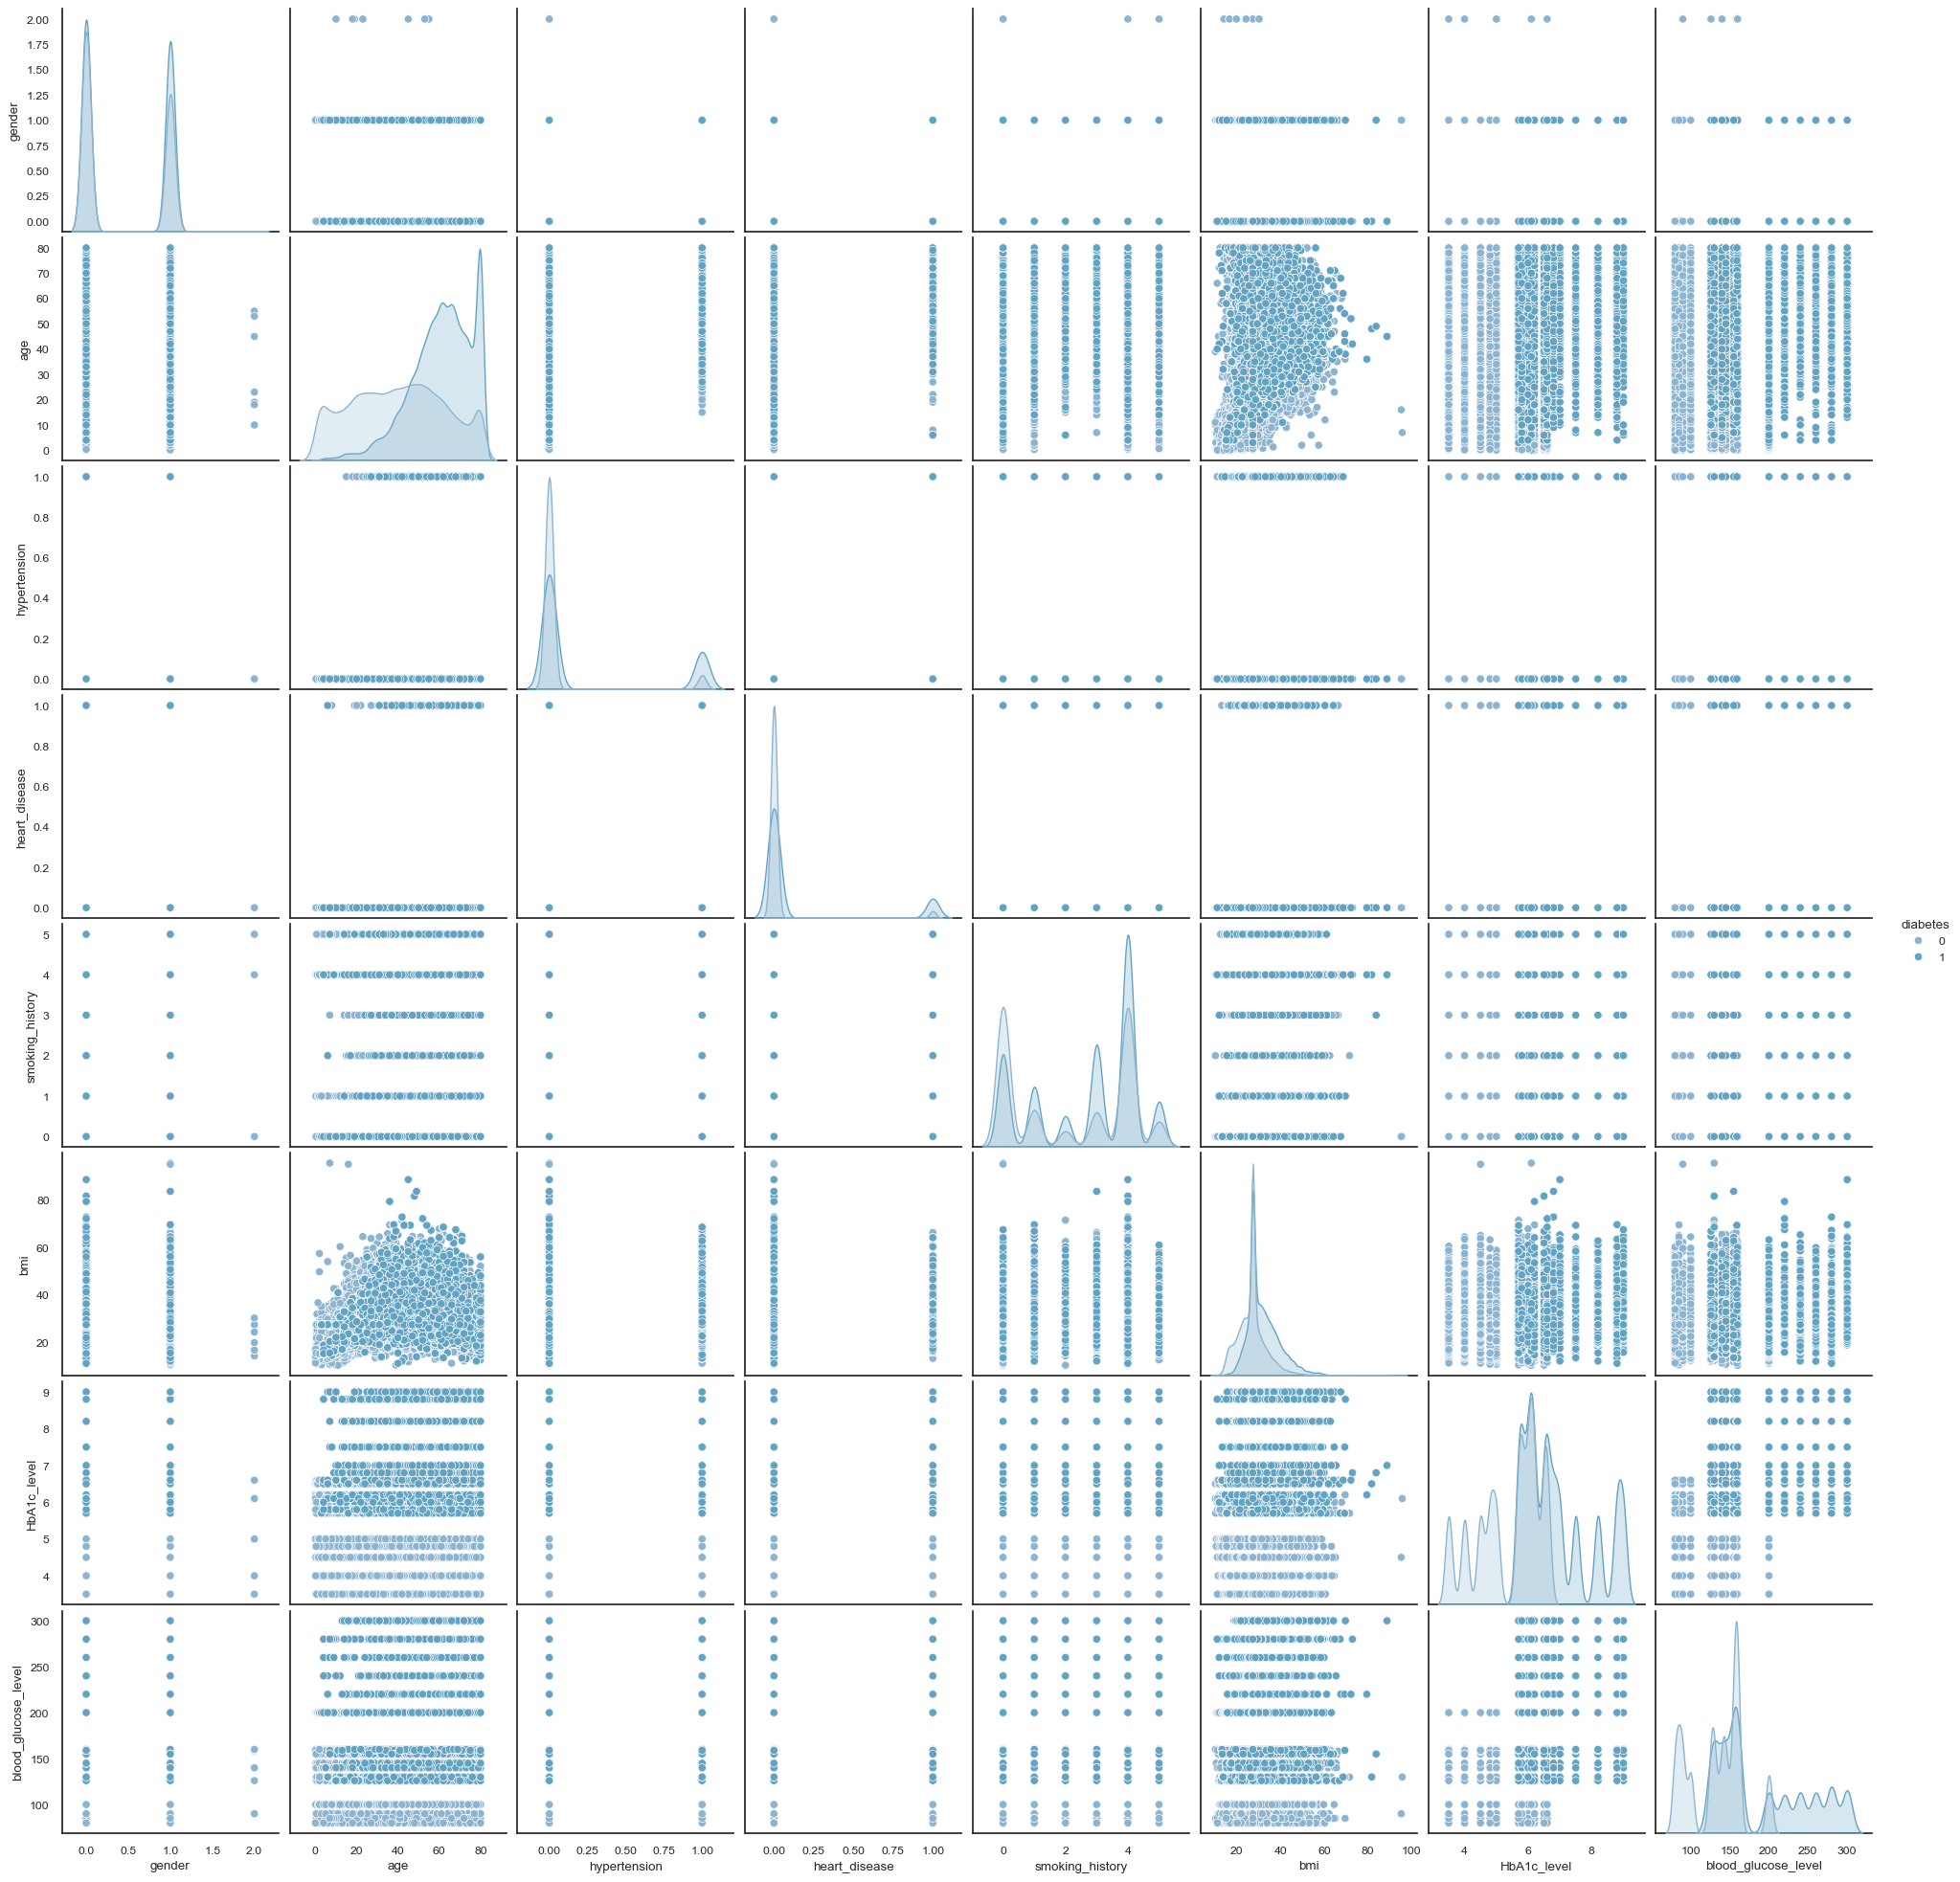

In [74]:
sns.pairplot(data = df,hue='diabetes')

### It show blood_glucose_level ,HbA1c_level,age,bmi are correlated with diabates

In [23]:
df["diabetes"].value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

In [24]:
percentage_negative=(87664*100)/len(df)
percentage_negative

91.17800012481018

In [25]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [26]:
CL=df[df["diabetes"]==0]


CL

New_data_CL = resample(CL,
             replace=True,
             n_samples=50000,
             random_state=30)
df=pd.concat([df[df["diabetes"]==1],New_data_CL])


In [27]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
91852,Female,53.0,0,0,ever,31.64,5.7,90,0
64850,Male,2.0,0,0,No Info,15.11,6.6,160,0
43029,Male,46.0,0,0,not current,27.66,5.0,155,0
2083,Male,15.0,0,0,never,23.40,6.1,155,0


In [28]:
CL=df[df["diabetes"]==1]


CL

New_data_CL = resample(CL,
             replace=True,
             n_samples=50000,
             random_state=30)
df=pd.concat([df,New_data_CL])

In [29]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
90133,Female,80.0,0,0,No Info,56.04,8.8,159,1
61650,Female,61.0,0,1,never,36.18,8.8,260,1
25908,Male,80.0,1,0,never,28.43,6.0,260,1
65032,Male,65.0,0,0,never,25.51,6.0,280,1


In [30]:
df["diabetes"].value_counts()

diabetes
1    58482
0    50000
Name: count, dtype: int64

91 percentage of data contains negative value so it is imbalanced data

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in non_numeric_col:
    df[col]=le.fit_transform(df[col])


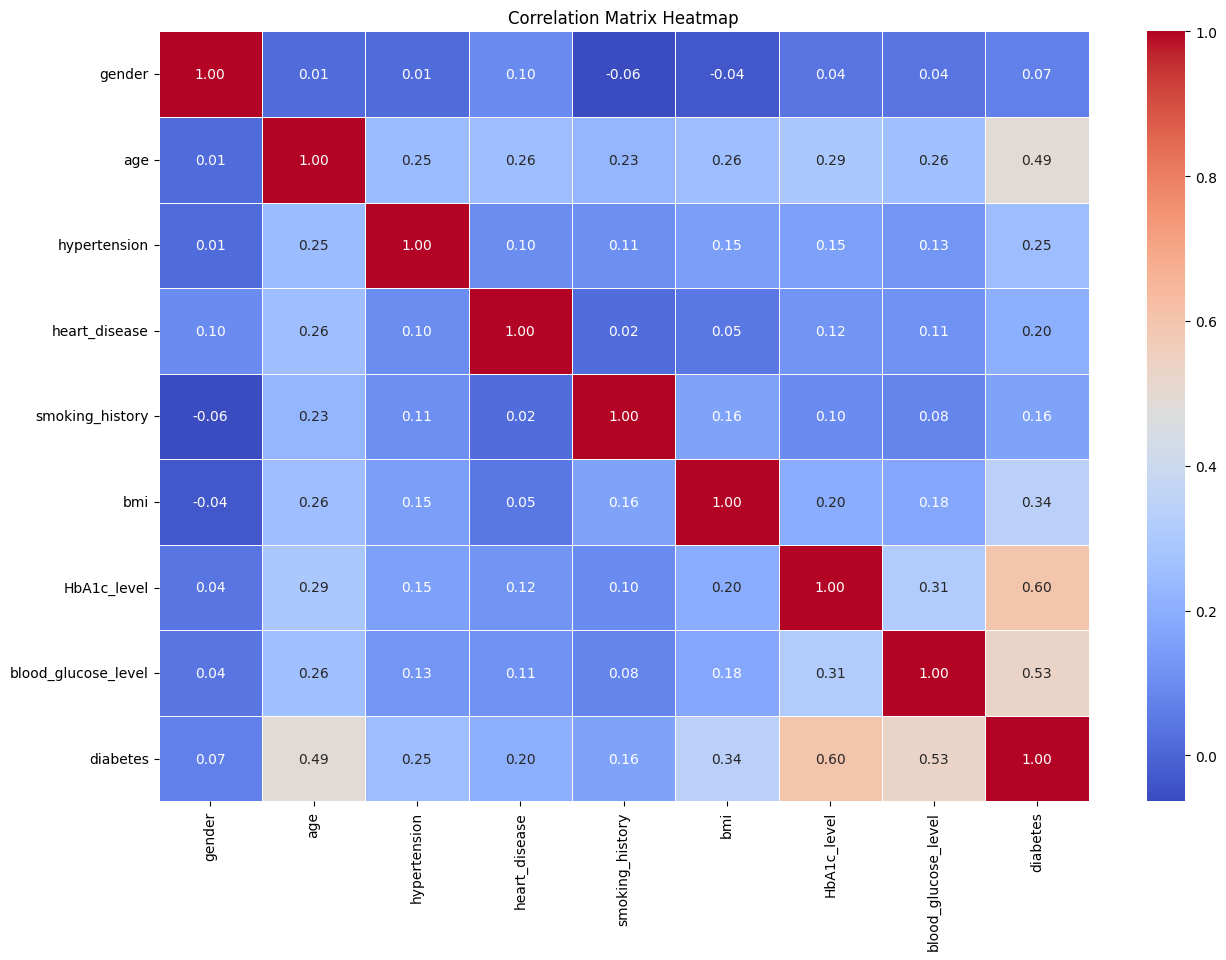

In [32]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

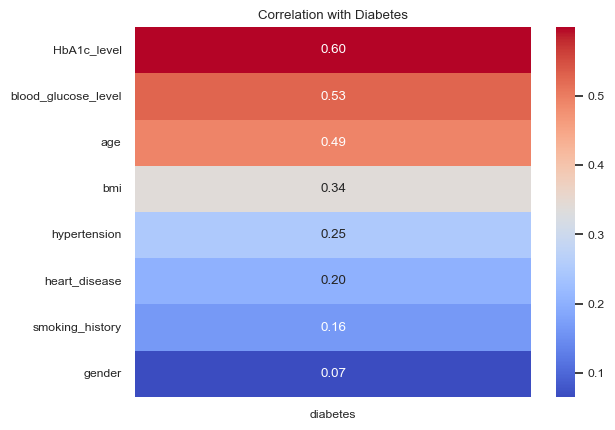

In [34]:
#Create a heatmap of the correlations with the target column
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [35]:
x = df.drop('diabetes', axis=1)
y =df['diabetes']

## Split The data into Train and Test data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [37]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
85869,1,56.0,1,0,5,34.44,6.0,240
87463,1,64.0,0,0,5,30.09,4.5,155
79377,0,41.0,1,0,4,41.07,7.0,260
81574,0,60.0,0,1,0,27.32,6.8,159
59258,0,72.0,0,0,4,31.17,8.8,280
...,...,...,...,...,...,...,...,...
8753,0,24.0,0,0,0,28.06,5.0,158
63791,0,80.0,0,0,5,27.32,6.1,280
22640,1,28.0,0,0,2,27.12,4.8,140
3459,0,10.0,0,0,0,27.32,6.2,200


In [38]:
# we first create a dictionary of the required models.

def fit_models(X_train, X_test, y_train, y_test):

    # Making a list of ML Classifiers 

    classifiers = {'Logistic Regression Classifier':LogisticRegressionCV(),
               'KNN Classifier':KNeighborsClassifier(),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'Random Forest Classifier':RandomForestClassifier(),
               'Support Vector Machine':SVC(),
               'Gradient Boosting Classifier':GradientBoostingClassifier(),
               "AdaBoostClassifier":AdaBoostClassifier(),
               'xgboost Classifier':XGBClassifier(),
               'Bayes Classifier': GaussianNB()}
    
    # Making a list to store the model accurary rate scores
    Model_acc_score = [] 

    # Making a list to store model precision val
    model_precision_val = []

    # Making a list to store model recall
    model_recall_val = []

    # Making a list to store F1 score
    model_F1_score = []
         
    # Making a index for containing the model names 
    index1 = []

    # Making a list to store time taken 
    time_taken = []

    

    # Using for loop to implement different machine learning models 
    for i in classifiers:

        begin = time.time()
        model = classifiers[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        end = time.time()
      
        index1.append(i)
        Model_acc_score.append(accuracy_score(y_test,y_pred))
        model_precision_val.append(precision_score(y_test,y_pred))
        model_recall_val.append(recall_score(y_test,y_pred))
        model_F1_score.append(f1_score(y_test,y_pred))
        time_taken.append(end-begin)
       
    
    # Creating a Data Frame to contain the calculated valued for model accuracy, precision, recall and f1 score.
    table = pd.DataFrame(data = np.array([Model_acc_score,model_precision_val,model_recall_val,model_F1_score,time_taken]).T,
                         columns = ['Accuracy Score','Precision','Recall','F1',"TimeTaken"],index=index1)
    table.index.name = 'Models'
    table_sorted = table.sort_values(by='Accuracy Score', ascending=False)
    print(f'Total time taken is {sum(time_taken)}')
    
    return table_sorted

In [39]:
df1=fit_models(X_train, X_test, y_train, y_test)

Total time taken is 200.43882584571838


In [40]:
df1

,Accuracy Score,Precision,Recall,F1,TimeTaken
Models,,,,,
Random Forest Classifier,0.983684,0.971285,0.999023,0.984959,5.282637
Decision Tree Classifier,0.980212,0.965243,0.998966,0.981815,0.138265
xgboost Classifier,0.938762,0.921545,0.967879,0.944144,0.201892
KNN Classifier,0.930158,0.899124,0.979256,0.937481,1.251041
Gradient Boosting Classifier,0.914795,0.903030,0.941792,0.922004,5.049280
AdaBoostClassifier,0.913750,0.905354,0.936620,0.920722,1.933179
Support Vector Machine,0.890029,0.874634,0.927254,0.900176,173.611107
Logistic Regression Classifier,0.886219,0.889736,0.898581,0.894136,12.954224
Bayes Classifier,0.839177,0.894662,0.792565,0.840524,0.017201


In [41]:
# function which plots accuracy scores, F1 score, along with time taken to fit for the models.
def search_plots(df1):
    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df1,y = df1.index,x = 'Accuracy Score',hue=df1.index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Accuracy Score for Different Models')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df1,y = df1.index,x = 'F1',hue=df1.index,order= df1['F1'].sort_values(ascending=False).index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('F1 Score for Different Models')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(5,5))
    ax = sns.barplot(data=df1,y = df1.index,x = 'TimeTaken',hue=df1.index,order= df1['TimeTaken'].sort_values(ascending=False).index)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Model Fitting Time for Different Models')
    plt.xticks(rotation=45)
    plt.show()

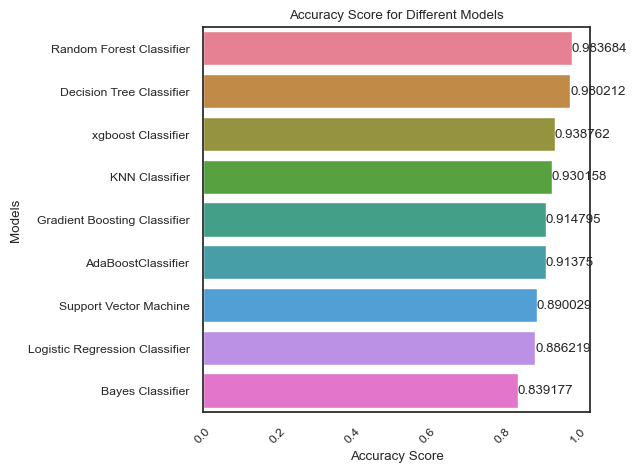

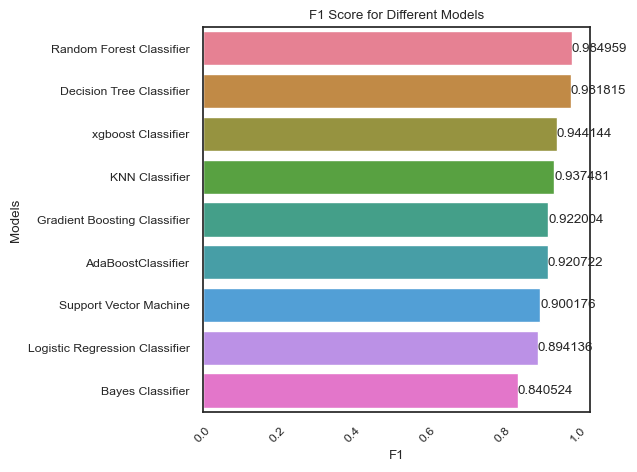

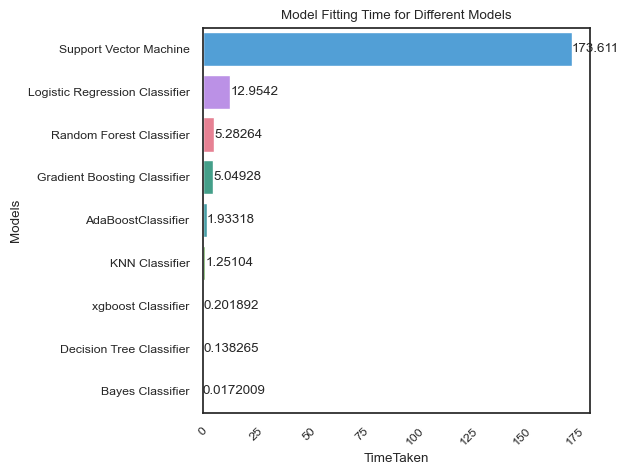

In [42]:
search_plots(df1)

## 1.gradient boosting classifier

In [43]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### prediction of gradientboost model

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [47]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9147948993701029
Confusion Matrix:
[[13382  1760]
 [ 1013 16390]]


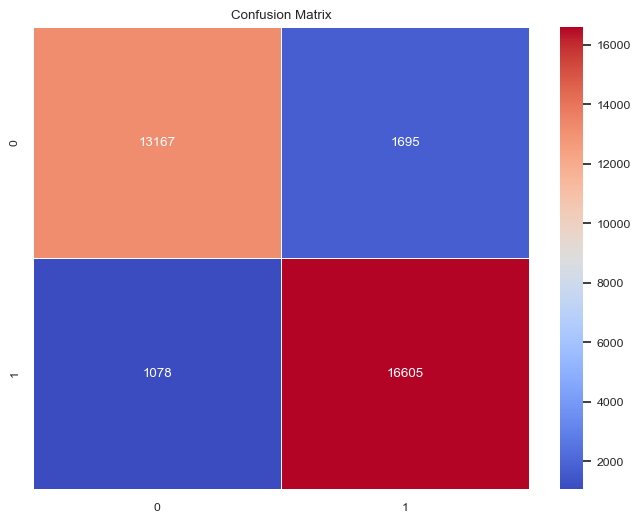

In [ ]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.show()

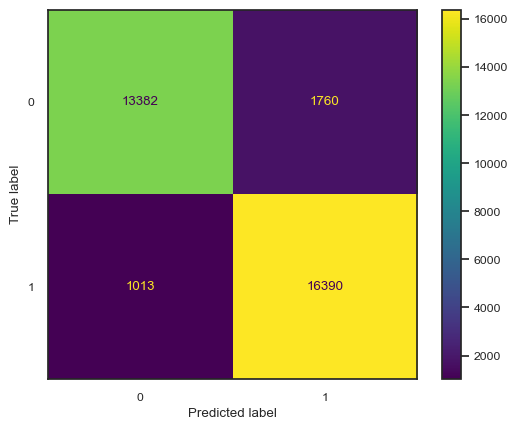

In [48]:

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                               display_labels=model.classes_)

disp.plot()
plt.show()

## Random forest Classifier

In [49]:
random_model=RandomForestClassifier()
random_model.fit(X_train, y_train)


RandomForestClassifier()

In [57]:
y_pred=random_model.predict(X_test)

In [58]:
accuracy_random = accuracy_score(y_test, y_pred)
print(accuracy_random)
conf_matrix_random= confusion_matrix(y_test, y_pred)
conf_matrix_random

0.9835919496082347


array([[14626,   516],
       [   18, 17385]], dtype=int64)

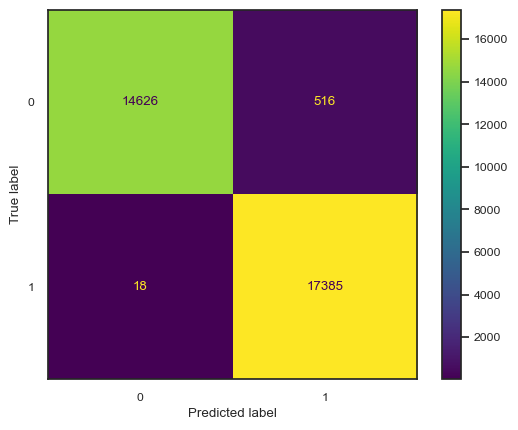

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_random,
                               display_labels=random_model.classes_)

disp.plot()
plt.show()

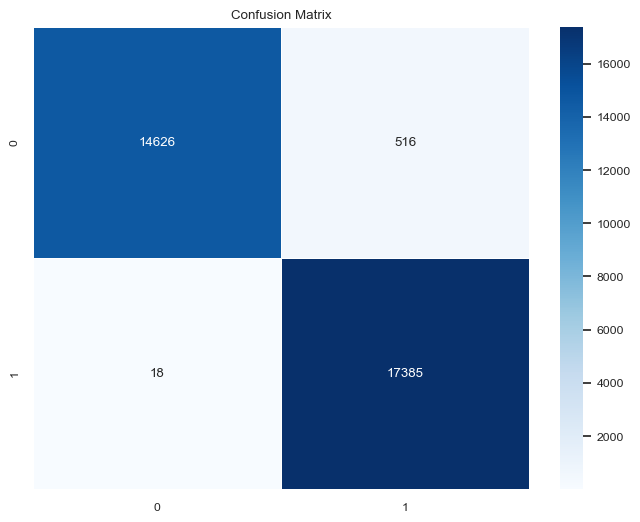

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_random, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.show()

In [66]:
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred=model_knn.predict(X_test)

In [69]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(accuracy_knn)
conf_matrix_knn= confusion_matrix(y_test, y_pred)
conf_matrix_knn

0.9301582424335535


array([[13230,  1912],
       [  361, 17042]], dtype=int64)

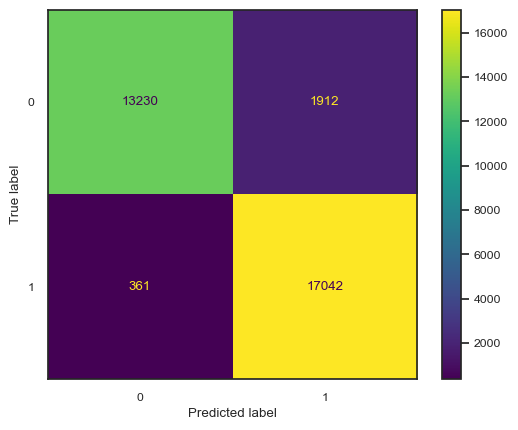

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn,
                               display_labels=random_model.classes_)

disp.plot()
plt.show()

##### We apply Nine Machine Leraning techniques taht are Random Forest, Support Vector Machine (SVM), Logistic Regression,Naive Bayes,adboost,Xgboost,Gradientboot,KNN. The proposed model is trained with a real dataset, which is collected from Kaggle. Furthermore, the performance of the proposed model is analysed using the confusion matrix, sensitivity and accuracy performance metrices. In Random forest, the accuracy is high, 98.36%, in comparison to other ML modelt.

##### It is crucial to provide a prompt and correct diagnosis while dealing with disorders like diabetes. If proper care is not taken, a delay in diabetes diagnosis can have devastating effects on health. Therefore, the accuracy of Machine learnig algorithms used to anticipate a patient's status must be maximised. A false negative has a much greater cost impact than a false positive. If the subject is given a false diagnosis, they may try to relax despite the significance of their situation. depicts the sensitivity and accuracy comparison of the proposed model. In the Random Forest, the accuracy is high, 98.36%% as compared to other models. whereas in SVM the accuracy is low, 89% as compared to other models. Furthermore, the sensitivity is slightly higher in RF, 99% in comparison to other models, and Bayes Classifier is lower, 89% in comparison to other models 